In [2]:
import tensorflow as tf

In [3]:
a = tf.constant(2)
b = tf.constant(3)

c = a + b
print(a)
a = a + b
print(a)
d = a + 3

Tensor("Const:0", shape=(), dtype=int32)
Tensor("add_1:0", shape=(), dtype=int32)


In [4]:
sess = tf.Session()
sess.run(d)

8

In [5]:
a1 = tf.constant([[1,2]])
a2 = tf.constant([[1,2], [3,4]])

In [6]:
sess.run(a2)

array([[1, 2],
       [3, 4]], dtype=int32)

In [7]:
res = tf.matmul(a1, a2)

In [8]:
sess.run(res)

array([[ 7, 10]], dtype=int32)

In [9]:
var1 = tf.Variable(1221)
var2 = tf.Variable(3)

sess.run(tf.global_variables_initializer())

addition = var1 + var2
sess.run(addition)

Instructions for updating:
Colocations handled automatically by placer.


1224

In [10]:
assign_var1 = var1.assign(121)

In [11]:
sess.run(assign_var1)

121

In [12]:
sess.run(addition)

124

In [13]:
x = tf.placeholder(tf.int32)
x2 = tf.placeholder(tf.int32)
y = x * 1
y2 = x + x2

sess = tf.Session()
a = [1,3, 3, 5]
sess.run([y,y2] , feed_dict={x:a, x2:a})

[array([1, 3, 3, 5], dtype=int32), array([ 2,  6,  6, 10], dtype=int32)]

In [14]:
sess.run(y, feed_dict={x:[2,3]})

array([2, 3], dtype=int32)

In [15]:
from tensorflow.examples.tutorials.mnist import input_data

In [16]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)  

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [17]:
mnist.train.images.shape

(55000, 784)

In [18]:
del x

In [19]:
import matplotlib.pyplot as plt

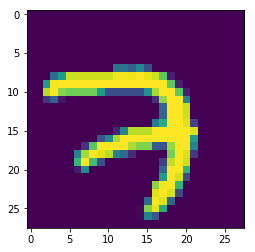

In [20]:
first_image = mnist.train.images[0]
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [21]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [22]:
mnist.test.images.shape

(10000, 784)

In [23]:
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10


weights = {
    'h1':tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2, n_classes])),
}

biases = {
    'h1':tf.Variable(tf.random_normal([n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes])),
}

In [24]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=() dtype=int32_ref>,
 <tf.Variable 'Variable_1:0' shape=() dtype=int32_ref>,
 <tf.Variable 'Variable_2:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_6:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_7:0' shape=(10,) dtype=float32_ref>]

In [25]:
def forward_propagation(x, weights, biases):
    input_hidden_1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    out_hidden_1 = tf.nn.relu(input_hidden_1)
    
    input_hidden_2 = tf.add(tf.matmul(out_hidden_1, weights['h2']), biases['h2'])
    out_hidden_2 = tf.nn.relu(input_hidden_2)
    
    input_output_layer = tf.add(tf.matmul(out_hidden_2, weights['out']), biases['out'])
    output = tf.sigmoid(input_output_layer)
    return output

In [26]:
x = tf.placeholder("float", shape=[None , n_input])
y = tf.placeholder(tf.int32, shape=[None, n_classes])
x, y

(<tf.Tensor 'Placeholder_2:0' shape=(?, 784) dtype=float32>,
 <tf.Tensor 'Placeholder_3:0' shape=(?, 10) dtype=int32>)

In [27]:
pred = forward_propagation(x, weights, biases)

In [28]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
c = sess.run(cost, feed_dict={x:mnist.train.images, y:mnist.train.labels})


NameError: name 'c' is not defined

In [ ]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize_step = optimizer.minimize(cost)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
batch_size = 1000
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimize_step], feed_dict={x:batch_x, y:batch_y})
        total_cost += c
    print(total_cost)

In [ ]:
predictions = tf.argmax(pred, axis = 1)
actual_labels = tf.argmax(y, axis = 1)

correct_predictions = tf.equal(predictions, actual_labels)

In [ ]:
corect_preds = sess.run(correct_predictions,feed_dict={x:mnist.test.images, y:mnist.test.labels} )

In [ ]:
corect_preds.sum()

In [ ]:
54705/55000